In [1]:
#reading cleansed dataset
import pandas as pd

df = pd.read_csv('processed_data.csv')
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status
count,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,5.326158e-17,1.006977e-16,1.689391e-16,7.573131e-17,-1.123486e-16,2.613146e-16,3.828176e-17,6.657697e-18,-5.617432e-17,4.327503e-17,-4.077840e-17,-4.826830e-17,1.140131e-16,-1.140131e-16,0.377840
std,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,0.484904
min,-1.731645e+00,-1.473548e+00,-1.731375e+00,-1.640450e+00,-1.559151e+00,-1.739665e+00,-1.164503e+00,-1.133237e+00,-1.628783e+00,-1.531382e+00,-1.004461e+00,-9.955592e-01,-9.927645e-01,-1.007288e+00,0.000000
25%,-8.658226e-01,-8.838247e-01,-8.405896e-01,-8.220748e-01,-8.584443e-01,-8.522468e-01,-8.108132e-01,-8.370048e-01,-8.378082e-01,-8.236472e-01,-1.004461e+00,-9.955592e-01,-9.927645e-01,-1.007288e+00,0.000000
50%,0.000000e+00,2.956212e-01,1.456473e-02,-7.005410e-02,-1.577371e-01,3.709143e-04,-2.879675e-01,-2.901149e-01,-5.781874e-02,-1.159123e-01,9.955592e-01,-9.955592e-01,-9.927645e-01,9.927645e-01,0.000000
75%,8.658226e-01,8.853442e-01,8.697190e-01,7.040849e-01,8.933237e-01,8.587888e-01,5.885679e-01,5.985812e-01,7.221707e-01,6.533647e-01,9.955592e-01,1.004461e+00,1.007288e+00,9.927645e-01,1.000000
max,1.731645e+00,1.475067e+00,1.724873e+00,2.694728e+00,1.594031e+00,1.740407e+00,3.325819e+00,3.287456e+00,2.644680e+00,2.991967e+00,9.955592e-01,1.004461e+00,1.007288e+00,9.927645e-01,1.000000


In [2]:
# preparing to train model by train-test-split

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split

x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)

# ct = ColumnTransformer([("only numeric",StandardScaler(),x.columns)],remainder='passthrough')

# x_train = ct.fit_transform(x_train)
# x_test = ct.transform(x_test)

x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

print(x_train.shape)
print(x_test.shape)
x.head(n=10)

(3201, 13)
(1068, 13)


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,0.995559,-0.995559,1.007288,-1.007288
1,-1.473548,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,-1.004461,1.004461,-0.992765,0.992765
2,0.295621,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,0.995559,-0.995559,1.007288,-1.007288
3,0.295621,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,0.995559,-0.995559,1.007288,-1.007288
4,1.475067,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,-1.004461,1.004461,-0.992765,0.992765
5,-1.473548,-0.092330,-0.180645,-0.157737,-1.629463,-0.103434,0.758091,-0.156691,0.037943,0.995559,-0.995559,-0.992765,0.992765
6,1.475067,1.297296,1.975885,-1.208798,0.452780,2.310883,2.239251,1.546103,-0.208226,0.995559,-0.995559,1.007288,-1.007288
7,-0.294102,0.228353,-0.014758,1.594031,-1.264055,0.880746,0.165627,-0.365420,0.314883,0.995559,-0.995559,-0.992765,0.992765
8,-1.473548,-1.517587,-1.430327,1.594031,1.055993,-0.949213,-0.950940,-1.354139,-1.346756,0.995559,-0.995559,-0.992765,0.992765
9,1.475067,-1.410692,-1.198085,-0.157737,-1.229255,-0.657035,-0.814218,-1.299210,-1.039045,-1.004461,1.004461,1.007288,-1.007288


In [3]:
# train model (MLP classifier by Sklearn)

from sklearn.neural_network import MLPClassifier


model = MLPClassifier(hidden_layer_sizes=(32,32),max_iter=300)
model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=300)

In [10]:
# evaluation accuracy

from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
print("Accuracy : {} %".format(round(accuracy_score(y_test,y_pred)*100,2)))

Accuracy : 97.0 %


<Axes: >

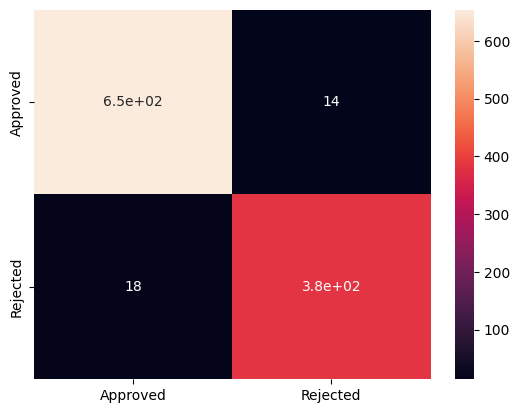

In [6]:
# evaluation by visualisation

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
df = pd.DataFrame(cm,index=["Approved","Rejected"],columns=["Approved","Rejected"])
sns.heatmap(data=df,annot=True,)